In [41]:
import csv
from pandas import DataFrame
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.spatial.distance import cdist
from kneed import KneeLocator
%matplotlib inline

In [42]:
# tabela = []
# with open('dados.csv') as csvfile: 
#     reader = csv.reader(csvfile) 
#     for row in reader:
#         tabela.append(row)
# Data = tabela

#df = DataFrame(Data,columns=['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'curso', 'linguagem'])


In [43]:
tabela = []
with open('binario.csv') as csvfile: 
    reader = csv.reader(csvfile) 
    for row in reader:
        tabela.append(row)

In [44]:
Data = tabela
df = DataFrame(Data,columns=['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'curso', 'linguagem'])

In [78]:
df

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,linguagem
0,001,22,0001,0001,001,010,0,0,011,010,0,001,"0010,0110",1
1,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0
2,001,22,0001,0001,001,001,0,1,010,011,0,001,0011,1
3,001,21,0001,0001,001,010,0,1,001,100,1,001,0100,1
4,001,22,0001,0001,001,010,0,0,011,010,0,001,0010,1
5,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0
6,001,22,0001,0001,001,001,0,1,010,011,0,001,"0010,0110",1
7,001,21,0001,0001,001,010,0,1,001,100,1,001,0100,1
8,001,22,0001,0001,001,010,0,0,011,010,0,001,0010,1
9,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0


In [77]:
# df2 = df.curso.str.split(',').apply(pd.Series)
# df2.index = df.set_index(['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'linguagem']).index
# df2.stack().reset_index(['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'linguagem'])

In [76]:

def expand(df, col, sep=','):
    r = df[col].str.split(sep)
    d = {c: df[c].values.repeat(r.str.len(), axis=0) for c in df.columns}
    d[col] = [i for sub in r for i in sub]
    
    return pd.DataFrame(d)
df2 = DataFrame(expand(expand(df, 'curso'), 'curso'))
df2

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,linguagem
0,001,22,0001,0001,001,010,0,0,011,010,0,001,0010,1
1,001,22,0001,0001,001,010,0,0,011,010,0,001,0110,1
2,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0
3,001,22,0001,0001,001,001,0,1,010,011,0,001,0011,1
4,001,21,0001,0001,001,010,0,1,001,100,1,001,0100,1
5,001,22,0001,0001,001,010,0,0,011,010,0,001,0010,1
6,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0
7,001,22,0001,0001,001,001,0,1,010,011,0,001,0010,1
8,001,22,0001,0001,001,001,0,1,010,011,0,001,0110,1
9,001,21,0001,0001,001,010,0,1,001,100,1,001,0100,1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


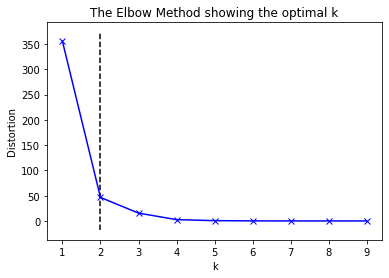

In [80]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df2)
    kmeanModel.fit(df2)
    distortions.append(sum(np.min(cdist(df2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])

# Grafico
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Mostra o K
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
kn.knee

plt.show()

In [81]:
kmeans = KMeans(n_clusters=kn.knee).fit(df2)
centroids = kmeans.cluster_centers_
centroids

array([[1.00000000e+00, 2.17142857e+01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 6.78571429e+00, 0.00000000e+00, 6.42857143e-01,
        7.78571429e+00, 3.60714286e+01, 2.85714286e-01, 1.00000000e+00,
        5.02142857e+01, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 1.00000000e+01, 1.01000000e+03,
        1.00000000e+00, 1.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+01, 0.00000000e+00]])

In [82]:
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [83]:
df2['K-classes'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


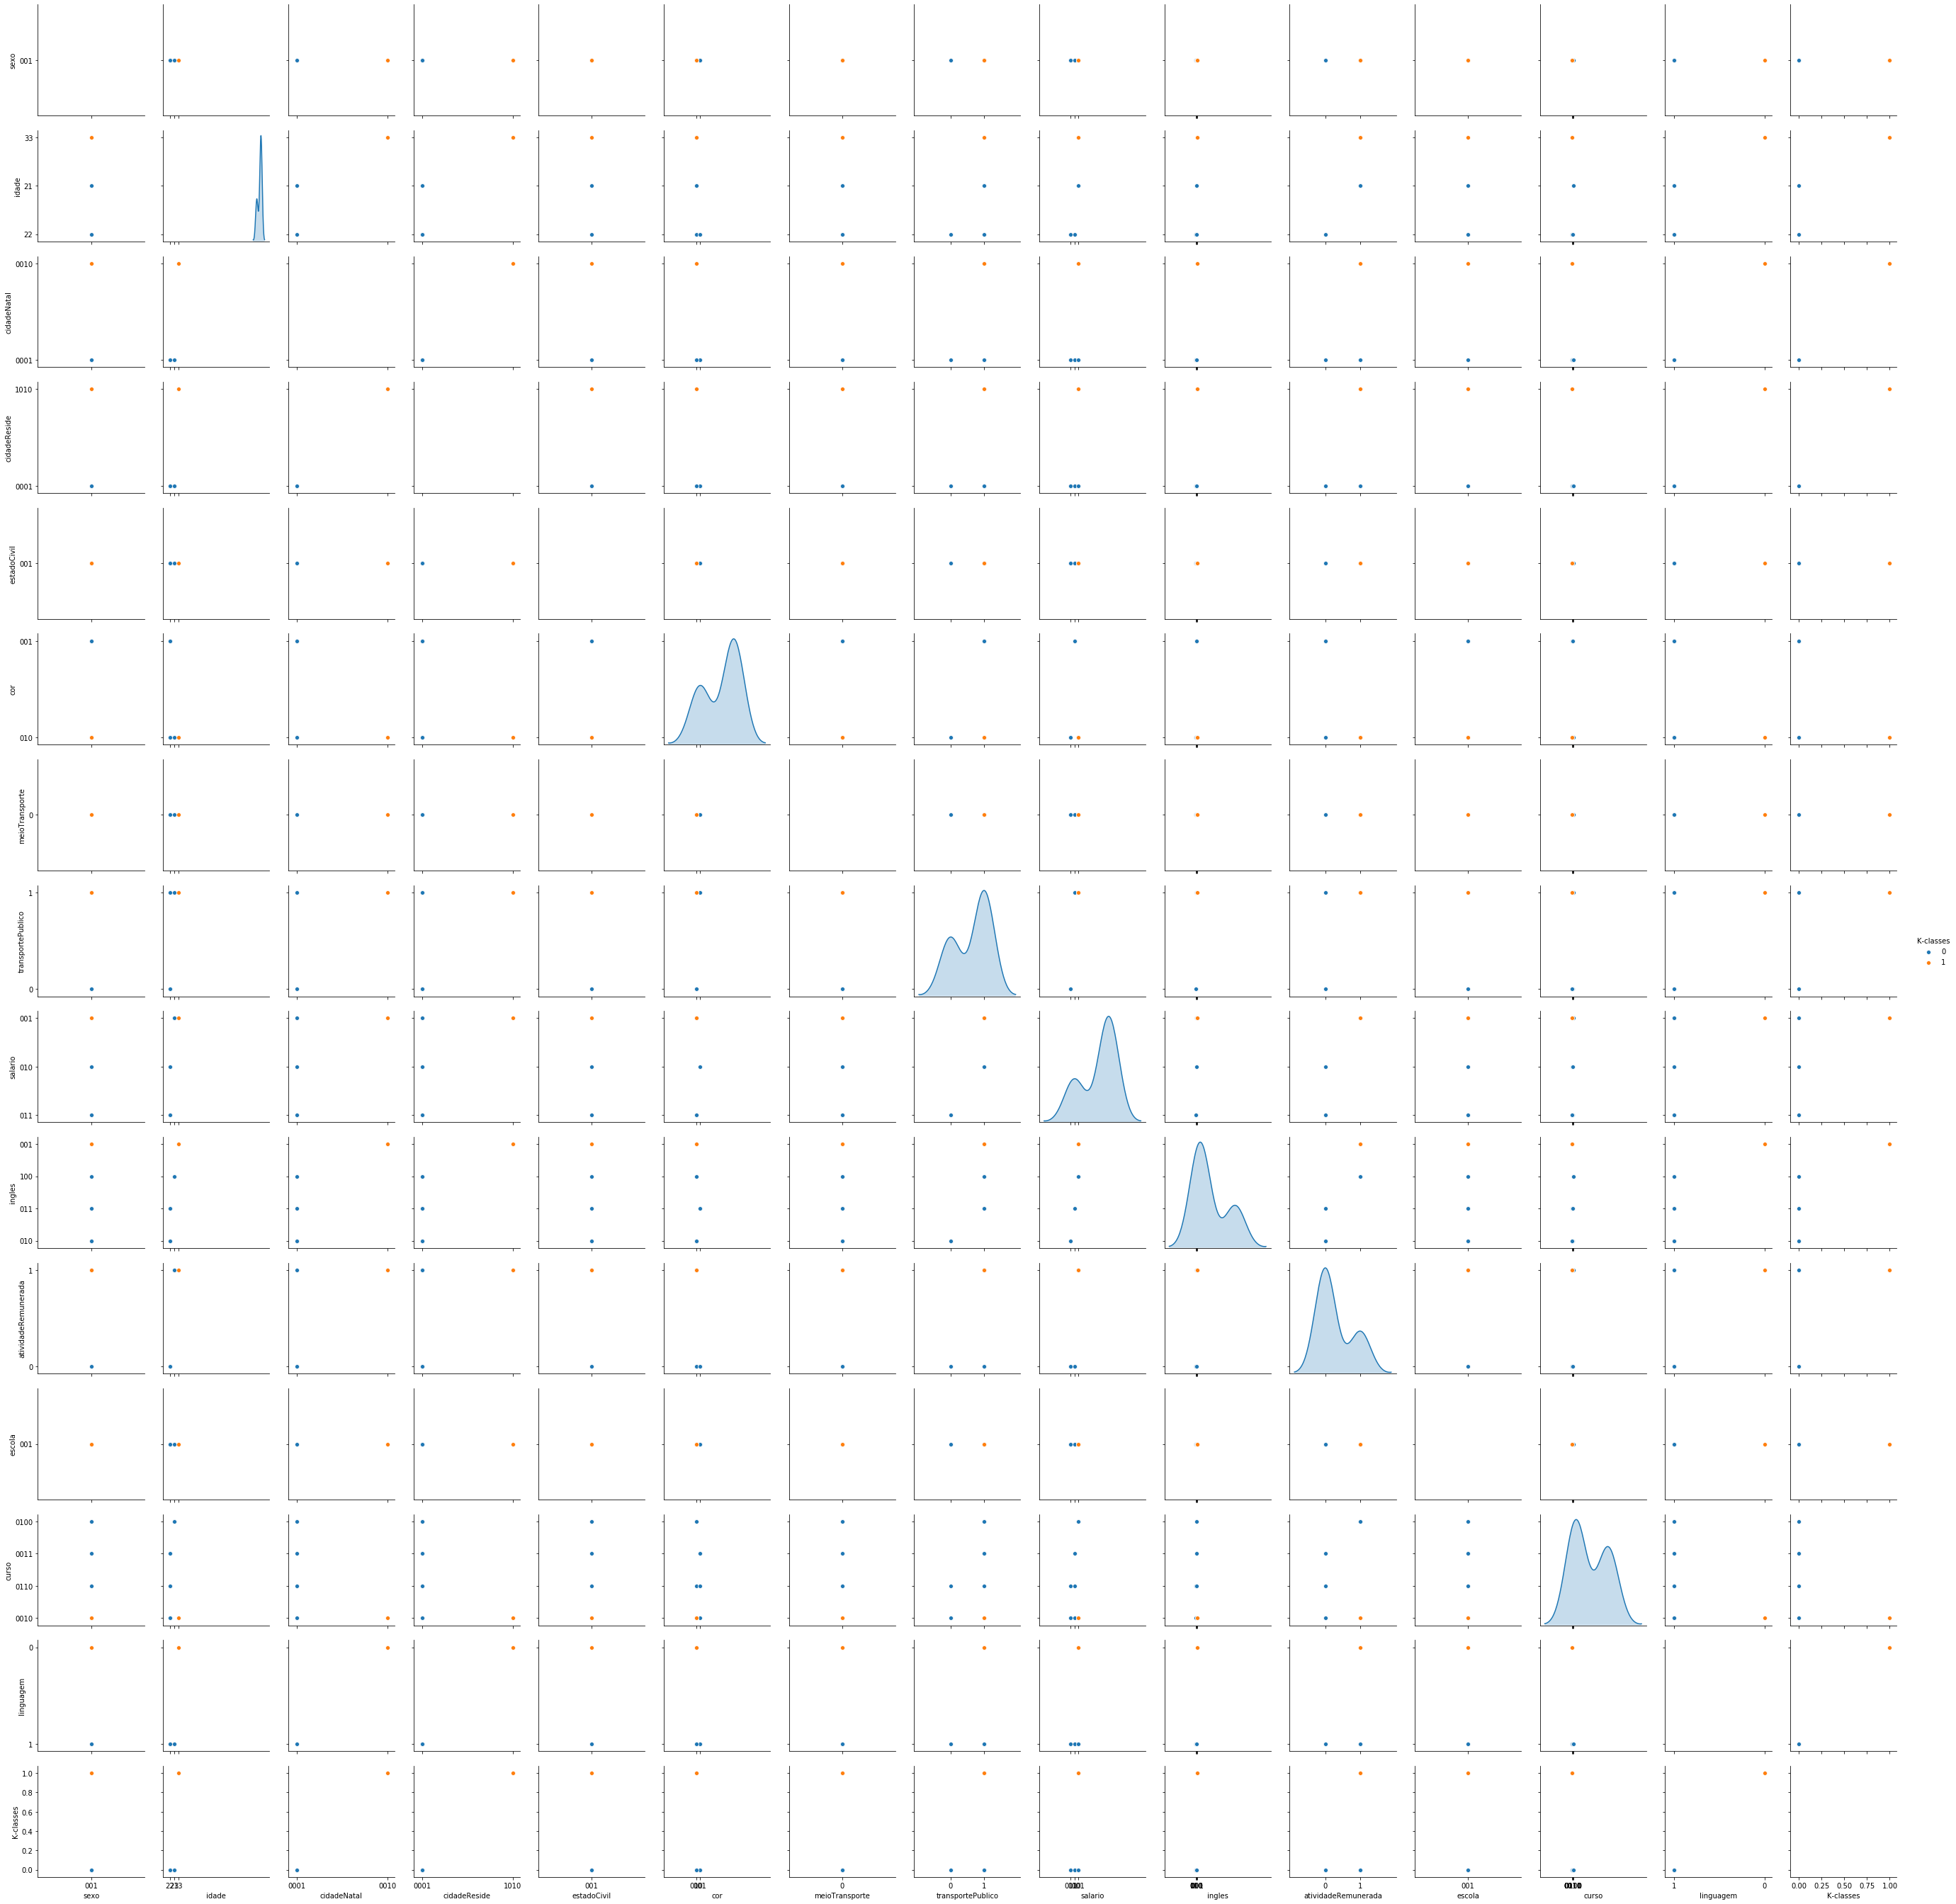

In [84]:
sb.pairplot(df2, hue='K-classes')

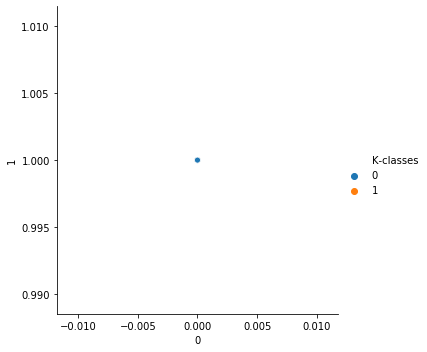

In [85]:
sb.relplot(x=0, y=1, hue="K-classes", data=df2);

In [86]:
df2

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,linguagem,K-classes
0,001,22,0001,0001,001,010,0,0,011,010,0,001,0010,1,0
1,001,22,0001,0001,001,010,0,0,011,010,0,001,0110,1,0
2,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0,1
3,001,22,0001,0001,001,001,0,1,010,011,0,001,0011,1,0
4,001,21,0001,0001,001,010,0,1,001,100,1,001,0100,1,0
5,001,22,0001,0001,001,010,0,0,011,010,0,001,0010,1,0
6,001,33,0010,1010,001,010,0,1,001,001,1,001,0010,0,1
7,001,22,0001,0001,001,001,0,1,010,011,0,001,0010,1,0
8,001,22,0001,0001,001,001,0,1,010,011,0,001,0110,1,0
9,001,21,0001,0001,001,010,0,1,001,100,1,001,0100,1,0


In [87]:
df2.dtypes
df2['ingles'].value_counts()

010    5
011    5
001    4
100    4
Name: ingles, dtype: int64

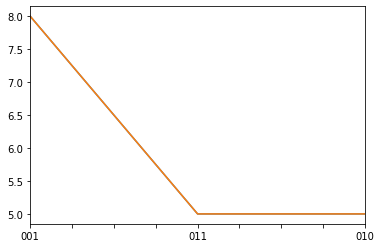

In [88]:
salarios = df2['salario'].value_counts()
salarios.plot()
df2['salario'].value_counts().plot()